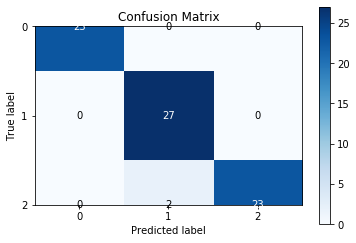

Score 0.9733333333333334


In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

np.random.seed(2)
datasets = load_iris()
X = datasets['data']
y = datasets['target']


#funzione che prende in input i due dataseet 'data' e 'target', la size del test rispetto al train e che tipo di modello usare
#restituisce lo score e la matrice di confusione
def calcola(X, y, testSize, models, c=None, Gamma = None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize) 
    if models == SVC:
        model = models(gamma= Gamma, C=c)
    else:
        model = models()
    model.fit(X_train, y_train)
    p = model.predict(X_train)
    acc = accuracy_score(y_train, p)
    plot_confusion_matrix(y_train, p)
    plt.show()
    return print(f'Score {acc}')


#eseguo il calcolo con un test_size di 0.5 e C=1

calcola(X, y, 0.5, SVC, 1, 'scale')

In [78]:
y_test

array([1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0,
       2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2])

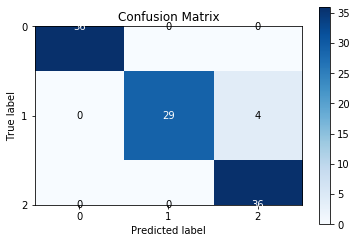

Score 0.9619047619047619


In [3]:
#eseguo il calcolo con un test_size di 0.3 e C=0.5
calcola(X, y, 0.3, SVC, 0.5, 'scale')

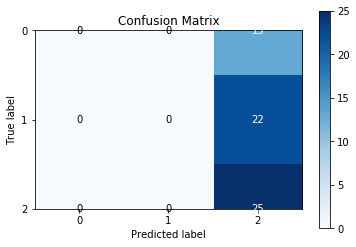

Score 0.4166666666666667


In [9]:
calcola(X, y, 0.6, SVC, 0.01, 0.001)

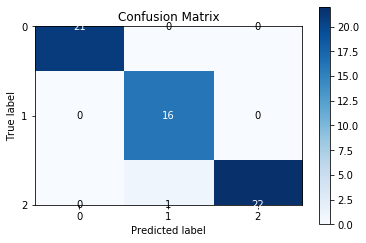

Score 0.9833333333333333


In [5]:
#al posto di SVC uso KNeighborsClassifier
calcola(X, y, 0.6, KNeighborsClassifier)

In [13]:
#Cross - validation 5 volte consecutive
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [14]:
#Cross - validation 10 volte consecutive
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [70]:
#PCA con 3 dimensioni di X invece che 4
X = datasets['data']
y = datasets['target']

def riduci(n_componenti, modello):
    pca = PCA(n_components=n_componenti)
    X_ridotto = pca.fit(X).transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_ridotto, y)
    model = modello(C=1, gamma=1)
    model.fit(X_train, y_train)
    p = model.predict(X_train)
    acc = accuracy_score(y_train, p)
    plot_confusion_matrix(y_train, p)
    plt.show()
    print(f'Score {acc}')

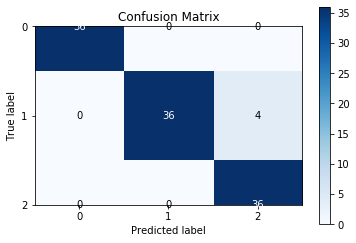

Score 0.9642857142857143


In [71]:
riduci(3, SVC)

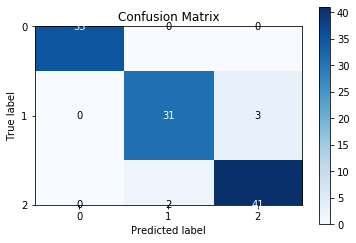

Score 0.9553571428571429


In [72]:
#uso solo 2 componenenti di X
riduci(2, SVC)

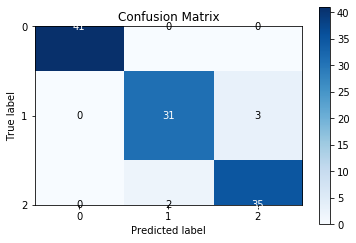

Score 0.9553571428571429


In [73]:
#uso solo 1 componenente di X
riduci(1, SVC)

In [66]:
#noto che piu' diminuisco le dimensioni piu lo score diminuisce

In [67]:
#Provo a disegnare un grafico usando solo due dimensioni
X = datasets['data']
y = datasets['target']

pca = PCA(n_components=2)
X_ridotto = pca.fit(X).transform(X)
X_ridotto = pd.DataFrame(data=X_ridotto, columns=['x', 'y'])

In [68]:
X_ridotto.head()

,x,y
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


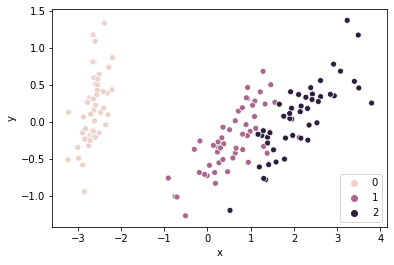

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='x', y='y', hue=y, data=X_ridotto)